# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [3]:
imdf_cyber = pd.read_csv("ExportedDatasets/cyberbullying_dataset.csv")

### 3.  Check first 10 lines

In [4]:
imdf_cyber.head(10)

tweet_text  cyberbullying_type
0         In other words your food was crapilicious                    0
1                                   Why is so white                    0
2         a classy whore Or more red velvet cupcakes                   0
3  meh P  thanks for the heads up but not too con...                   0
4  This is an ISIS account pretending to be a Kur...                   0
5  Yes the test of god is that good or bad or ind...                   0
6  Itu sekolah ya bukan tempat bully Ga jauh kaya...                   0
7  Karma I hope it bites Kat on the butt She is j...                   0
8                    everything but mostly my priest                   0
9  Rebecca Black Drops Out of School Due to Bullying                   0

### 4. Check Datasets type values and sum & drop duplicates

In [5]:
imdf_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91801 entries, 0 to 91800
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          91801 non-null  object
 1   cyberbullying_type  91801 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
imdf_cyber['cyberbullying_type'].value_counts()

1    50178
0    41623
Name: cyberbullying_type, dtype: int64

In [7]:
imdf_cyber.tweet_text.duplicated().sum()

40901

In [8]:
imdf_cyber.duplicated().sum()

37337

In [9]:
imdf_cyber.duplicated(subset=['tweet_text']).sum()

40901

In [10]:
final_dataset = imdf_cyber.drop_duplicates()
final_dataset.to_csv('ExportedDatasets/cyberbullying_dataset_duplicates.csv')

In [11]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54464 entries, 0 to 79706
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          54464 non-null  object
 1   cyberbullying_type  54464 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [18]:
final_dataset['cyberbullying_type'].value_counts()

1    39990
0    14474
Name: cyberbullying_type, dtype: int64

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

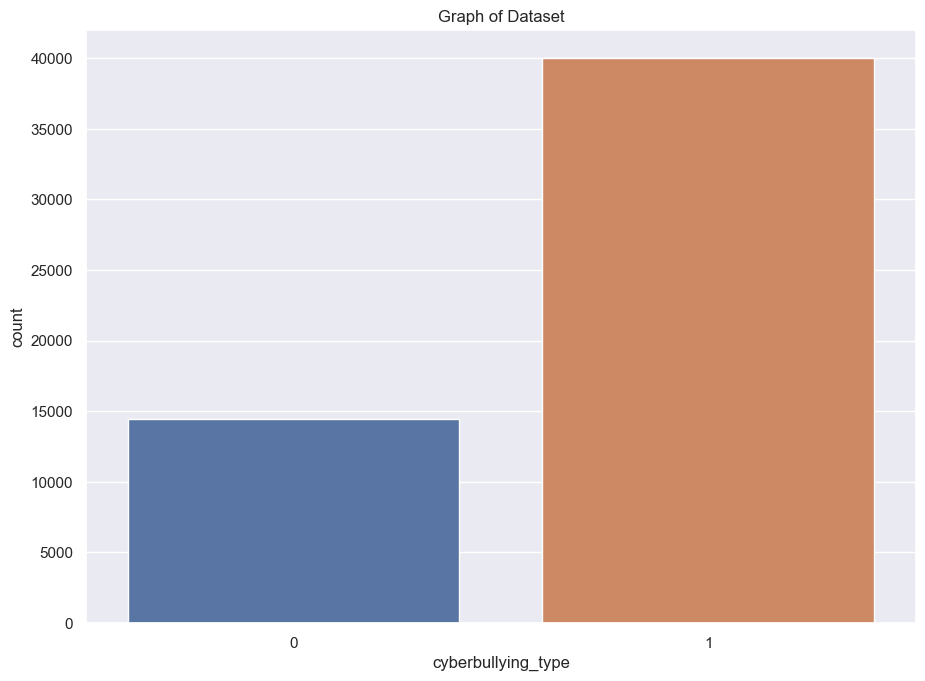

In [12]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=final_dataset).set(title="Graph of Dataset")

### 5.1.1  Handle Imbalanced Dataset

In [15]:
cyberbullying = final_dataset[final_dataset.cyberbullying_type == 1]
print(cyberbullying)

                                              tweet_text  cyberbullying_type
7819   rape is realzvasiyana nema jokes about being d...                   1
7820   You never saw any celebrity say anything like ...                   1
7821   I mean hes gay but he uses gendered slurs and ...                   1
7822                                            feminazi                   1
7823   Rape is rape And the fact that I read one post...                   1
...                                                  ...                 ...
63871  I didnt think Id hate a couple more than these...                   1
63891  Nope call me sexist but gender roles are defin...                   1
63896   Some of you people will call me sexist and mi...                   1
63904        Im not sexist but I hate all female rappers                   1
79706   A Misogynist A woman wants her man to treat h...                   1

[39990 rows x 2 columns]


In [17]:
no_cyberbullying = final_dataset[final_dataset.cyberbullying_type == 0]
print(no_cyberbullying)

                                              tweet_text  cyberbullying_type
0             In other words your food was crapilicious                    0
1                                       Why is so white                    0
2             a classy whore Or more red velvet cupcakes                   0
3      meh P  thanks for the heads up but not too con...                   0
4      This is an ISIS account pretending to be a Kur...                   0
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[14474 rows x 2 columns]


In [20]:
cyberbullying_sample = cyberbullying.sample(n=15526)

In [21]:
print(cyberbullying_sample.shape)

(15526, 2)


In [22]:
final_dataset = pd.concat([cyberbullying_sample, no_cyberbullying], axis=0)

In [23]:
final_dataset.head()

tweet_text  cyberbullying_type
34286  Safe  go to school but NOT safe  go to Fl Hes ...                   1
57758   Exactly how is any male supposed to protect h...                   1
30360  its still the same company running it The rapi...                   1
32248  Watching Tucker without sound brings up a lot ...                   1
38719  I remember in middle school these kids would h...                   1

In [24]:
final_dataset.shape

(30000, 2)

In [25]:
final_dataset.info

<bound method DataFrame.info of                                               tweet_text  cyberbullying_type
34286  Safe  go to school but NOT safe  go to Fl Hes ...                   1
57758   Exactly how is any male supposed to protect h...                   1
30360  its still the same company running it The rapi...                   1
32248  Watching Tucker without sound brings up a lot ...                   1
38719  I remember in middle school these kids would h...                   1
...                                                  ...                 ...
63915  Soz my kitchen rules Ive lost interest the ins...                   0
63916  Feeling so sorry for the girls they should be ...                   0
63917  pretty good dishes were happy with  OK well Im...                   0
63919              You are too stupid to talk to Blocked                   0
63920  And before you protest that youre not mad ther...                   0

[30000 rows x 2 columns]>

### 6.  WordCloud of Dataset

In [26]:
text = ''.join(final_dataset["tweet_text"].tolist())

In [27]:
''.join(final_dataset["tweet_text"].tolist())

'Safe  go to school but NOT safe  go to Fl Hes a draft dodger bully amp a coward He dont use mask cuz they test who sees him first Trusthes a coward Exactly how is any male supposed to protect himself against  the Sulkowicz Scenario  its still the same company running it The rapist still is allowed to volunteerWatching Tucker without sound brings up a lot of bad memories of high school bulliesI remember in middle school these kids would harass and bully this gay kid and when shit got physical lets just say the gay kid wasnt the one running awayFat ass sound dumb as fuck How is it not racism when somebody spray paints Nigger on your house He white washed for realsomeones mad  hands you a tampon   Fuck that dumb nigger Obama Bloodthirsty Muslims flock to ISIS theatre that loop jihadi atrocities they enjoy watching Weird to be tweeting when youre supposedly chased off of Twitter they look like theyd attempt to bully you in middle school and then act different when guys are around througho

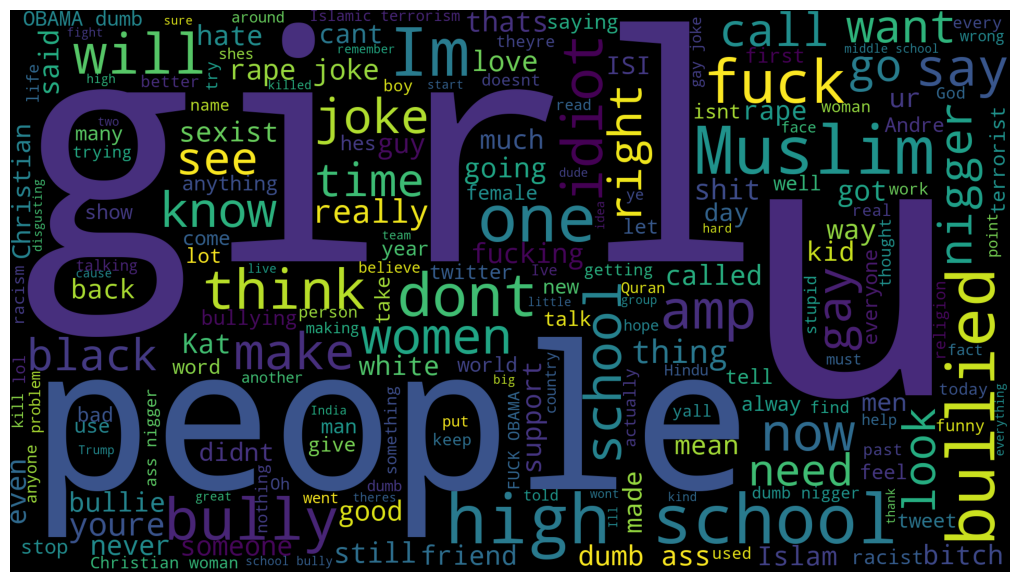

In [29]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 7. Stopwords

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [32]:
final_dataset.shape

(30000, 2)

In [33]:
final_dataset.head()

tweet_text  cyberbullying_type
34286  Safe  go to school but NOT safe  go to Fl Hes ...                   1
57758   Exactly how is any male supposed to protect h...                   1
30360  its still the same company running it The rapi...                   1
32248  Watching Tucker without sound brings up a lot ...                   1
38719  I remember in middle school these kids would h...                   1

In [34]:
final_dataset.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [35]:
#separating tweet_text & cyberbullying_type
X = final_dataset.drop(columns='cyberbullying_type', axis=1)
Y = final_dataset['cyberbullying_type']
X.to_csv('ExportedDatasets/cyberbullying_X.csv')
Y.to_csv('ExportedDatasets/cyberbullying_Y.csv')

In [36]:
print(X)
print(Y)

                                              tweet_text
34286  Safe  go to school but NOT safe  go to Fl Hes ...
57758   Exactly how is any male supposed to protect h...
30360  its still the same company running it The rapi...
32248  Watching Tucker without sound brings up a lot ...
38719  I remember in middle school these kids would h...
...                                                  ...
63915  Soz my kitchen rules Ive lost interest the ins...
63916  Feeling so sorry for the girls they should be ...
63917  pretty good dishes were happy with  OK well Im...
63919              You are too stupid to talk to Blocked
63920  And before you protest that youre not mad ther...

[30000 rows x 1 columns]
34286    1
57758    1
30360    1
32248    1
38719    1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


### 9. Stemming: Process of reducing a word to its root word

In [37]:
port_stem = PorterStemmer()

In [38]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [39]:
final_dataset['tweet_text'] = final_dataset['tweet_text'].apply(stemming)

In [40]:
print(final_dataset['tweet_text'])

34286    safe go school safe go fl he draft dodger bull...
57758       exactli male suppos protect sulkowicz scenario
30360          still compani run rapist still allow volunt
32248    watch tucker without sound bring lot bad memor...
38719    rememb middl school kid would harass bulli gay...
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [41]:
text = ''.join(final_dataset["tweet_text"].tolist())
''.join(final_dataset["tweet_text"].tolist())

'safe go school safe go fl he draft dodger bulli amp coward dont use mask cuz test see first trusth cowardexactli male suppos protect sulkowicz scenariostill compani run rapist still allow voluntwatch tucker without sound bring lot bad memori high school bullirememb middl school kid would harass bulli gay kid shit got physic let say gay kid wasnt one run awayfat ass sound dumb fuck racism somebodi spray paint nigger hous white wash realsomeon mad hand tampon fuck dumb nigger obamabloodthirsti muslim flock isi theatr loop jihadi atroc enjoy watchweird tweet your supposedli chase twitterlook like theyd attempt bulli middl school act differ guy around throughout high schoolah one girl bulli high school bc emo cool thing tri fit fuckoh use nicknam real name mentionye muslim includ prophet revel illiteracisalut start dialogu race uk found stealer america learn behavior racism treat color skin less somewher also talk repar close wealth gapokay scientist teach rat play hide seek underwear dra

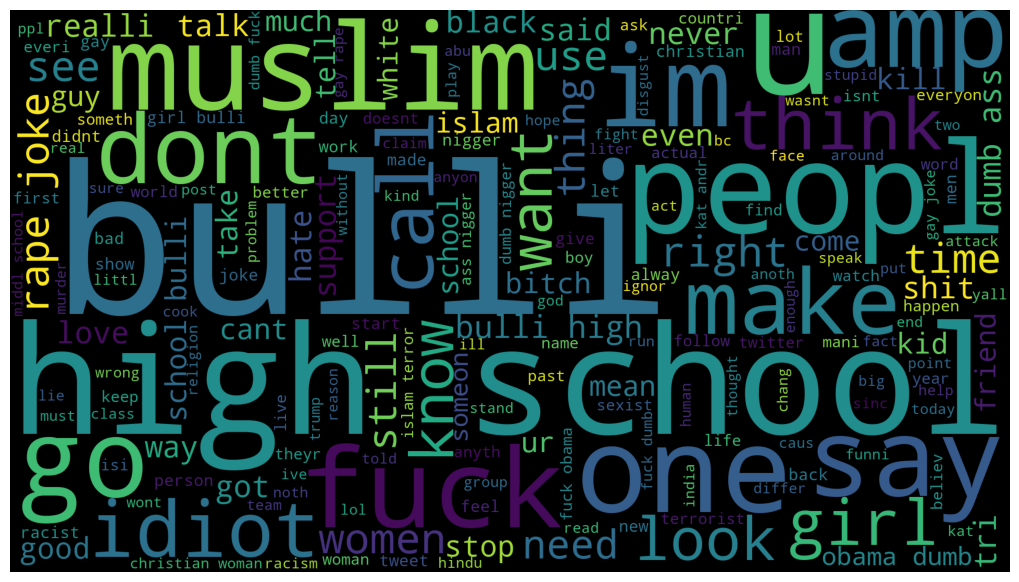

In [42]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [43]:
#separating tweet_text & cyberbullying_type
X = final_dataset['tweet_text']
Y = final_dataset['cyberbullying_type']

In [44]:
print(X)

34286    safe go school safe go fl he draft dodger bull...
57758       exactli male suppos protect sulkowicz scenario
30360          still compani run rapist still allow volunt
32248    watch tucker without sound bring lot bad memor...
38719    rememb middl school kid would harass bulli gay...
                               ...                        
63915    soz kitchen rule ive lost interest instant res...
63916                feel sorri girl safe kat andr go home
63917    pretti good dish happi ok well im never eat place
63919                                    stupid talk block
63920    protest your mad there much reason youd tweet ...
Name: tweet_text, Length: 30000, dtype: object


In [45]:
X.shape

(30000,)

In [46]:
print(Y)

34286    1
57758    1
30360    1
32248    1
38719    1
        ..
63915    0
63916    0
63917    0
63919    0
63920    0
Name: cyberbullying_type, Length: 30000, dtype: int64


In [47]:
Y.shape

(30000,)

### 11. Train/Test Splitting

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [49]:
X_train.shape

(24000,)

In [50]:
X_test.shape

(6000,)

In [51]:
Y_train.shape

(24000,)

In [54]:
Y_test.shape

(6000,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [55]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [56]:
print(X_train_transform)

  (0, 7982)	0.5935541557854441
  (0, 16008)	0.37189330352113015
  (0, 2951)	0.3445577002780245
  (0, 17391)	0.3129512118795938
  (0, 565)	0.35834701378259165
  (0, 4436)	0.29576579256893265
  (0, 7357)	0.27720097180088
  (1, 1560)	0.2910169321839246
  (1, 4331)	0.25829286480004243
  (1, 20053)	0.2359622833136701
  (1, 19051)	0.2115194833332671
  (1, 403)	0.252276010802358
  (1, 15843)	0.17564955412366448
  (1, 18356)	0.16016469213487008
  (1, 666)	0.14801075039578182
  (1, 13691)	0.38800470760744127
  (1, 10785)	0.19074372527263986
  (1, 7868)	0.1917233301070179
  (1, 567)	0.2910169321839246
  (1, 2536)	0.1023211541824554
  (1, 7411)	0.16114215313900718
  (1, 14376)	0.19483683701685875
  (1, 7231)	0.12835384796613936
  (1, 10520)	0.11755144883602028
  (1, 10741)	0.15828747970617693
  :	:
  (23997, 3227)	0.23136345702044192
  (23997, 2331)	0.1636752491143992
  (23997, 20011)	0.1462839118937685
  (23997, 10023)	0.1636752491143992
  (23997, 20543)	0.2408609778941373
  (23997, 14953)	0.099

In [57]:
print(X_test_transform)

  (1, 17120)	0.3810820184801411
  (1, 12580)	0.4230944041810706
  (1, 9780)	0.4296028257552868
  (1, 9767)	0.29427908892270993
  (1, 8620)	0.2623430071559704
  (1, 6316)	0.3256759375347241
  (1, 727)	0.33042144442578253
  (1, 183)	0.34719137322012933
  (2, 19945)	0.4411107904739365
  (2, 19403)	0.3220277681557951
  (2, 19051)	0.42229120275691856
  (2, 15279)	0.41645571679949245
  (2, 5939)	0.5064766447057225
  (2, 1109)	0.3056723269300406
  (3, 20665)	0.4620813636024819
  (3, 20053)	0.22112345258911328
  (3, 17501)	0.2747193057121436
  (3, 16732)	0.22322899962704798
  (3, 16705)	0.21550898438966878
  (3, 14549)	0.23159608831261078
  (3, 13539)	0.17624302679906298
  (3, 11897)	0.21550898438966878
  (3, 10706)	0.16565274154039666
  (3, 10605)	0.17603387477473306
  (3, 10520)	0.22031811066109835
  :	:
  (5997, 19948)	0.44826659511637
  (5997, 16728)	0.37874653979368933
  (5997, 16073)	0.16923375407913588
  (5997, 16013)	0.22125120967279302
  (5997, 10520)	0.17836467696706085
  (5997, 6782

### 12. Training the Model: Logistic Regression (LR)

In [58]:
modelLR = LogisticRegression()

In [59]:
modelLR.fit(X_train_transform, Y_train)

LogisticRegression()

#### Evaluation: Accuracy Score

In [60]:
X_train_prediction = modelLR.predict(X_train_transform)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [61]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8606666666666667


In [62]:
X_test_prediction = modelLR.predict(X_test_transform)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [63]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.829


In [64]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      3243
           1       0.78      0.88      0.82      2757

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000



### 13. Training the Model: Support Vector Machine(SVM)

In [65]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.0001)
svm.fit(X_train_transform, Y_train)

LinearSVC(C=0.0001)

In [66]:
svm_predict = svm.predict(X_train_transform)
svm_training_data_accuracy = accuracy_score(Y_train,svm_predict)

print('Accuracy score of the training data : ', svm_training_data_accuracy)

Accuracy score of the training data :  0.5221666666666667


In [67]:
svm_predict_test = svm.predict(X_test_transform)
svm_test_data_accuracy = accuracy_score(Y_test,svm_predict_test)

print('Accuracy score of the test data : ', svm_test_data_accuracy)

Accuracy score of the test data :  0.5213333333333333


In [68]:
print(classification_report(svm_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.01      0.97      0.02        29
           1       1.00      0.52      0.68      5971

    accuracy                           0.52      6000
   macro avg       0.50      0.74      0.35      6000
weighted avg       0.99      0.52      0.68      6000



### 14. Training the Model: Naive Bayes

In [69]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_transform, Y_train)

MultinomialNB()

In [70]:
from sklearn.metrics import accuracy_score
nb_predict = mnb.predict(X_train_transform)
nb_training_data_accuracy = accuracy_score(Y_train,nb_predict)

print('Accuracy score of the training data : ', nb_training_data_accuracy)

Accuracy score of the training data :  0.8249583333333333


In [71]:
nb_predict_test = mnb.predict(X_test_transform)
nb_test_data_accuracy = accuracy_score(Y_test,nb_predict_test)

print('Accuracy score of the test data : ', nb_test_data_accuracy)

Accuracy score of the test data :  0.7418333333333333


In [72]:
print(classification_report(nb_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70      2232
           1       0.86      0.71      0.77      3768

    accuracy                           0.74      6000
   macro avg       0.74      0.75      0.74      6000
weighted avg       0.77      0.74      0.75      6000



### 15. Training the Model: Decision Tree


In [73]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_transform,Y_train)

DecisionTreeClassifier()

In [74]:
dt_predict = dt.predict(X_train_transform)
dt_training_data_accuracy= accuracy_score(Y_train, dt_predict)

print('Accuracy score of the training data : ', dt_training_data_accuracy)

Accuracy score of the training data :  0.95975


In [75]:
dt_predict_test = dt.predict(X_test_transform)
dt_test_data_accuracy=accuracy_score(Y_test, dt_predict_test)

print('Accuracy score of the test data : ', dt_test_data_accuracy)

Accuracy score of the test data :  0.7836666666666666


In [76]:
print(classification_report(dt_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      3087
           1       0.76      0.81      0.78      2913

    accuracy                           0.78      6000
   macro avg       0.78      0.78      0.78      6000
weighted avg       0.79      0.78      0.78      6000



### 16. Training the Model: Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30)
rf.fit(X_train_transform, Y_train)

RandomForestClassifier(n_estimators=30)

In [78]:
rf_predict = rf.predict(X_train_transform)
rf_training_data_accuracy=accuracy_score(Y_train, rf_predict)

print('Accuracy score of the training data : ', rf_training_data_accuracy)

Accuracy score of the training data :  0.9587916666666667


In [79]:
rf_predict_test = rf.predict(X_test_transform)
rf_test_data_accuracy=accuracy_score(Y_test, rf_predict_test)
print('Accuracy score of the test data : ', rf_test_data_accuracy)

Accuracy score of the test data :  0.804


In [80]:
print(classification_report(rf_predict_test,Y_test))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      3217
           1       0.76      0.85      0.80      2783

    accuracy                           0.80      6000
   macro avg       0.81      0.81      0.80      6000
weighted avg       0.81      0.80      0.80      6000



### 17. Training the Model: XGBoost

In [81]:
import xgboost as xgb

modelXGB = xgb.XGBClassifier()
modelXGB.fit(X_train_transform,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [82]:
xgb_prediction = modelXGB.predict(X_train_transform)
xgb_training_data_accuracy=accuracy_score(Y_train, xgb_prediction)

print('Accuracy score of the training data : ', xgb_training_data_accuracy)

Accuracy score of the training data :  0.865625


In [83]:
xgb_prediction_test = modelXGB.predict(X_test_transform)
xgb_test_data_accuracy=accuracy_score(Y_test, xgb_prediction_test)

print('Accuracy score of the test data : ', xgb_test_data_accuracy)

Accuracy score of the test data :  0.8421666666666666


In [84]:
print(classification_report(xgb_prediction_test,Y_test))

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      3534
           1       0.74      0.94      0.83      2466

    accuracy                           0.84      6000
   macro avg       0.85      0.86      0.84      6000
weighted avg       0.86      0.84      0.84      6000



### 18.Summary

In [85]:
from sklearn.ensemble import VotingClassifier
# 1) naive bayes = mnb
# 2) logistic regression =modelLR
# 3) random forest =rf
# 4) support vector machine = svm
# 5) Decision Tree = dt
# 6) XGBoost = modelXGB
evc=VotingClassifier(estimators=[('mnb',mnb),('modelLR',modelLR),('rf',rf),('svm',svm),('dt',dt),('modelXGB',modelXGB)],voting='hard')
evc.fit(X_train_transform, Y_train)
evc_prediction = evc.predict(X_train_transform)
evc_prediction_test = evc.predict(X_test_transform)
evc_accuracy = accuracy_score(Y_train, evc_prediction)
evc_accuracy_test = accuracy_score(Y_test, evc_prediction_test)
print("score on test: " , evc_accuracy_test)
print("score on train: ", evc_accuracy)

score on test:  0.8221666666666667
score on train:  0.9291666666666667
